In [1]:
import importlib

import utils
from utils import fit_scaling_laws, plot_actual_vs_predicted, plot_fit
ENTITY = "stanford-mercury"
PROJECT = "marin"

# define the list of smaller runs to use as "ladder" models
RUNS = [
    "tootsie-scaling-512-81c36c",
    "tootsie-scaling-768-d17a90",
    "tootsie-scaling-1024-f4e4be",
    "tootsie-scaling-1536-e2a6d8",
    "tootsie-scaling-2048-72c648",
]

DEFAULT_RUNS = [
    "scaling-law-suite-default-512-9b1182",
    "scaling-law-suite-default-768-0631eb",
    "scaling-law-suite-default-1024-e6a4e5",
    "scaling-law-suite-default-1536-51914a",
    "scaling-law-suite-default-2048-14ef39",
]



# the large run to predict the performance of
PRED_RUN = "llama-8b-tootsie-0.001-19ad63"

# define the eval task loss metric
TASK_LOSS = "eval/paloma/c4_en/bpb"
# TASK_LOSS = "internal_eval/mmlu/bpb"

# do we want to take the last step of the run or average over all steps, or just use all steps?
AGGREGATION = "all"

TOKENS_COL = "throughput/total_tokens"
PARAM_COL = "parameter_count"
PARAM_COL_TO_USE = "computed_params"

# accuracy we ultimately want to predict
TASK_ACCURACY = "lm_eval/hellaswag_10shot/acc"


/Users/nikilravi/miniconda3/envs/crfm_new/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-02-22 15:48:01,823	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


In [2]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [3]:
results = fit_scaling_laws(
    runs=DEFAULT_RUNS,
    loss_metrics=[TASK_LOSS],
    accuracy_metrics=[TASK_ACCURACY],
    entity=ENTITY,
    project=PROJECT,
    pred_run=PRED_RUN,
    use_log_for_ND=True,
    normalize_ND=True,
)


Dataframe:       eval/paloma/c4_en/bpb  throughput/total_tokens  \
0                 3.764435             4.194304e+06   
1                 1.261079             4.198498e+09   
2                 1.152727             8.392802e+09   
3                 1.122585             1.258711e+10   
4                 1.108450             1.678141e+10   
5                 1.095670             2.097571e+10   
6                 1.089930             2.517002e+10   
7                 1.084524             2.936432e+10   
8                 1.081941             3.355863e+10   
9                 1.078349             3.775293e+10   
10                1.074535             4.614154e+10   
11                1.071555             5.033584e+10   
12                1.070949             5.453015e+10   
13                1.067829             5.872445e+10   
14                1.066954             6.291875e+10   
15                1.065103             6.711306e+10   
16                1.065312             7.130736e+10  

In [5]:
results

({},
 ({'eval/paloma/c4_en/bpb': (array([0.88075703, 0.84879279, 0.83596116, 0.8281104 , 0.82302022,
           0.81882006, 0.81641668, 0.81367987, 0.81223959, 0.8107903 ,
           0.80884665, 0.80795377, 0.80673552, 0.80621433, 0.80519038,
           0.80455309, 0.80363607, 0.80237347, 0.80176669, 0.80091393,
           0.80123138, 0.80021042, 0.79994798, 0.79999822, 0.79894078,
           0.79975969, 0.7989825 , 0.7979725 , 0.79744339, 0.79764444,
           0.79725903, 0.7963618 , 0.79696178, 0.79613042, 0.79593462,
           0.79567122, 0.79516333, 0.79545355, 0.79514819, 0.79176152,
           0.79132468, 0.79041171, 0.78982705, 0.78952217, 0.7895807 ,
           0.78898627, 0.78872025, 0.78849959, 0.78850639, 0.78796756,
           0.78779185, 0.78690326, 0.78722352, 0.78678226, 0.7862345 ,
           0.78649789, 0.78638011, 0.7860859 , 0.78561205, 0.78554761,
           0.78619677, 0.78568959, 0.78554815, 0.78551286, 0.78490293,
           0.78483886, 0.78501928, 0.78438234, 

eval/paloma/c4_en/bpb
[0.88075703 0.84879279 0.83596116 0.8281104  0.82302022 0.81882006
 0.81641668 0.81367987 0.81223959 0.8107903  0.80884665 0.80795377
 0.80673552 0.80621433 0.80519038 0.80455309 0.80363607 0.80237347
 0.80176669 0.80091393 0.80123138 0.80021042 0.79994798 0.79999822
 0.79894078 0.79975969 0.7989825  0.7979725  0.79744339 0.79764444
 0.79725903 0.7963618  0.79696178 0.79613042 0.79593462 0.79567122
 0.79516333 0.79545355 0.79514819 0.79176152 0.79132468 0.79041171
 0.78982705 0.78952217 0.7895807  0.78898627 0.78872025 0.78849959
 0.78850639 0.78796756 0.78779185 0.78690326 0.78722352 0.78678226
 0.7862345  0.78649789 0.78638011 0.7860859  0.78561205 0.78554761
 0.78619677 0.78568959 0.78554815 0.78551286 0.78490293 0.78483886
 0.78501928 0.78438234 0.78446639 0.78501964 0.7845459  0.7840997
 0.78449345 0.78442794 0.78412217 0.78367698 0.78419703 0.78532344
 0.78386343 0.78318363 0.78275383 0.78356421 0.78376573 0.78342468]
[0.88345583 0.86040896 0.84918247 0.8420

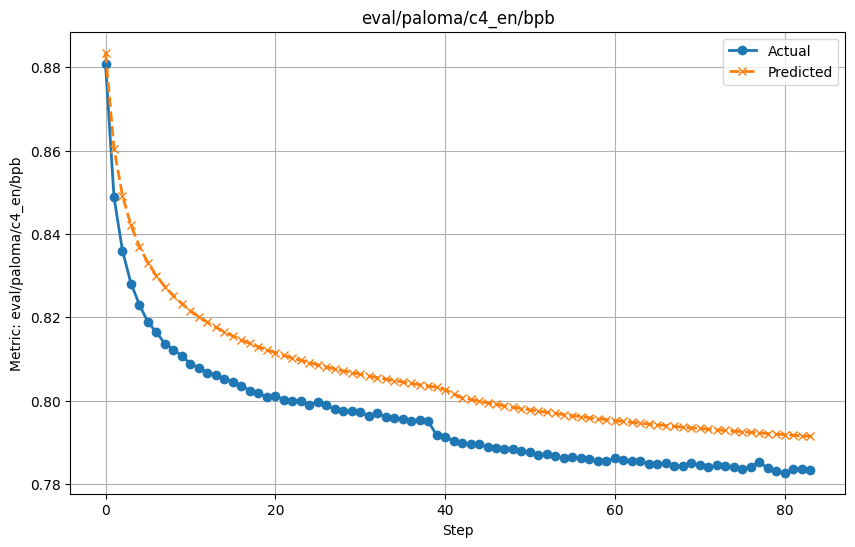

In [6]:
_, predictions, _ = results
loss_results, accuracy_results = predictions

for loss_metric, (actual, predicted) in loss_results.items():
    print(loss_metric)
    print(actual)
    print(predicted)

    # plot actual vs predicted
    plot_actual_vs_predicted(actual, predicted, loss_metric)
    break
    



lm_eval/hellaswag_10shot/acc_from_eval/paloma/c4_en/bpb
[0.58882693 0.58364868 0.58374826 0.58783111 0.58305119 0.5873332
 0.59141605 0.58922525 0.58573989 0.58653655 0.58803027 0.584047
 0.58344951 0.59320852 0.5906194  0.58862776 0.58643696 0.59051982
 0.58743278 0.59559849 0.59261103 0.59430392 0.59091814 0.59370643
 0.59470225 0.59101773 0.59430392 0.59121689 0.59440351 0.59788887
 0.59520016 0.58972316 0.25044812 0.25044812 0.25044812 0.25044812
 0.59629556 0.60047799 0.5976897  0.59042024 0.59888468 0.60077674
 0.59998008 0.5960964  0.59739096]
[0.54441779 0.54496569 0.54596239 0.54684834 0.5472562  0.54764343
 0.54801179 0.54836283 0.54869794 0.54901834 0.54932512 0.54961928
 0.54990169 0.55017315 0.55043439 0.55068607 0.55092878 0.55116308
 0.55138945 0.55160836 0.55182023 0.55202546 0.55222439 0.55241736
 0.55260467 0.55278662 0.55296346 0.55313545 0.55330281 0.55346576
 0.55362449 0.5537792  0.55393007 0.55407725 0.5542209  0.55436118
 0.55449821 0.55463213 0.55476306 0.55489

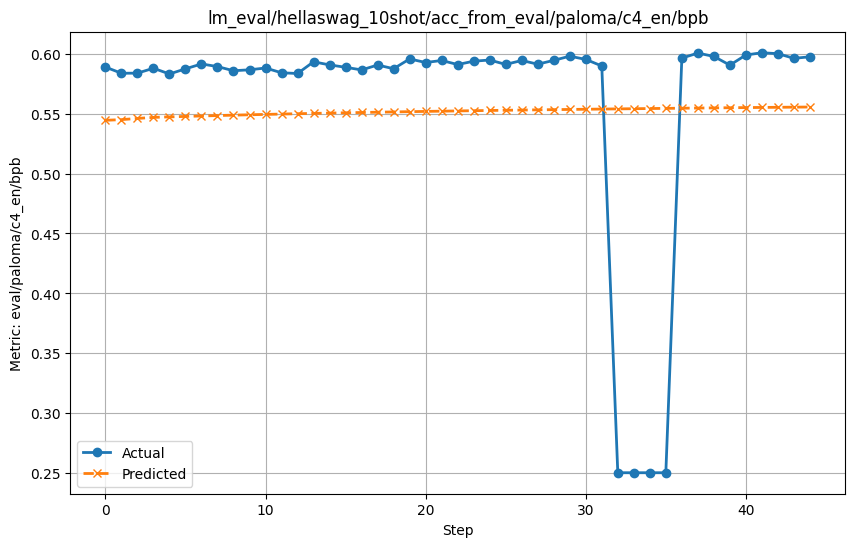

In [7]:
_, predictions, _ = results
loss_results, accuracy_results = predictions

for acc_metric, (actual, predicted) in accuracy_results.items():
    print(acc_metric)
    print(actual)
    print(predicted)

    # plot actual vs predicted
    plot_actual_vs_predicted(actual, predicted, acc_metric)
    break
    
